In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from matplotlib.pyplot import plot
import pylab
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import shapiro

# one sample t-test

In [2]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
               157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
               203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
       216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [3]:
stat, p = shapiro(olcumler) # verilerin normal dağılım olup olmadığını test eder.
print('Statistics = %.3f, P=%.3f' % (stat, p))
# p value alpha ile kıyaslanır. alpha'dan büyük olması fail to reject.
# stat değeri alanı veren noktadır.

Statistics = 0.985, P=0.785


In [4]:
alpha = 0.05
if p > alpha:
    print("Fail to recejt! - Örneklem normal dağılımdan gelmektedir.")
else:
    print("Reject! - Örneklerm normal dağılımdan gelmemektedir.")

Fail to recejt! - Örneklem normal dağılımdan gelmektedir.


In [5]:
# one sample t-test

stats.ttest_1samp(olcumler, popmean=170)
# hipotezim ortalamanın 170 olup olmadığı.
# h0 > M0 = 170
# h1 > M1 != 170
# alpha 0.05 (%95 güven aralığı) ve test çift taraflı olduğu için grafiğin 0.025 ve 0.975 aralığı fail to reject aralığı oluyor. 
# p değeri 0.0344 < 0.05 olduğu için hipotezimi 'reject' ediyorum ve %95 güven aralığında M0 != 170'dir diyorum.
# alpha = 0.1 (%90 güven aralığı) olsaydı fail to reject alanım daralacaktı.
# alpha = 0.01 (%99 güven aralığında) 

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [6]:
stats.t.ppf(q=0.025, df = len(olcumler)-1) # alpha = 0.05 yani %95lik güven aralığındaki t değerim nedir?

-2.0095752344892093

In [7]:
stats.t.cdf(x=-2.1753117985877966, df = len(olcumler)-1)*2 # 2 taraflı olduğu için 2 ile çarpılır.

0.034460415195071446

In [8]:
sms.DescrStatsW(olcumler).tconfint_mean() # güven aralığının bulunması

(139.95008462736266, 168.80991537263733)

# farklı veri gruplarının karşılaştırılması

In [9]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
  
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [10]:
A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["Kadın", "Erkek"]
A_B.head()

,Kadın,Erkek
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [11]:
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:]= "A"
A = pd.concat([A, GRUP_A], axis=1)
A.head()

,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [12]:
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:]= "B"
B = pd.concat([B, GRUP_B], axis=1)
B.head()

,0,0
0,37,B
1,39,B
2,31,B
3,31,B
4,34,B


In [13]:
AB = pd.concat([A,B])
AB.columns = ["Gelir", "Grup"]
AB

,Gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A
5,30,A
6,20,A
7,20,A
8,27,A
9,32,A


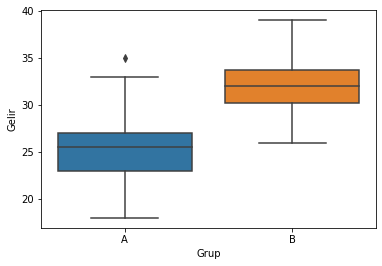

In [14]:
sns.boxplot(x='Grup', y='Gelir', data = AB)

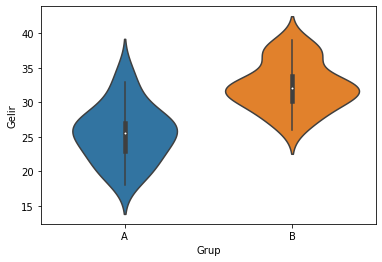

In [15]:
sns.violinplot(x='Grup', y='Gelir', data = AB)

In [16]:
shapiro(A_B.Kadın) # verinin normal dağılım sahip olup olmadığını test ediyorum.


(0.9789242148399353, 0.7962799668312073)

In [17]:
shapiro(A_B.Erkek) # verinin normal dağılım sahip olup olmadığını test ediyorum.

(0.9561260342597961, 0.24584221839904785)

In [18]:
stats.levene(A_B.Kadın, A_B.Erkek) # p value = 0.29 > alpha olduğu için hipotezimi 'fail to reject' yani kabul ediyorum 
# varyansın yakın olması verilerin aynı dağılıma sahip olduğunu ifade eder.

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [19]:
stats.ttest_ind(A_B["Kadın"], A_B["Erkek"], equal_var = True) # varyansın aynı olduğunu söyleyerek t test yaptık 
# p değeri alpha'dan küçük olduğu için reject ediyorum.
# test sonucunda göre iki veri seti arasında anlamlı bir fark vardır.

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

# aynı kişilerin öncesi ve sonrası durumlarının kıyaslanması

In [20]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,120,127,123])

In [21]:
grup_oncesi = np.arange(len(oncesi))
grup_oncesi = pd.DataFrame(grup_oncesi)
grup_oncesi[:] = 'oncesi'
A = pd.concat([oncesi, grup_oncesi], axis = 1)

In [22]:
grup_sonrasi = np.arange(len(sonrasi))
grup_sonrasi = pd.DataFrame(grup_sonrasi)
grup_sonrasi[:] = 'sonrasi'
B = pd.concat([sonrasi, grup_sonrasi], axis = 1)

In [23]:
AB = pd.concat([A, B])
AB.columns = ['skor', 'oncesi_sonrasi']
AB

,skor,oncesi_sonrasi
0,123,oncesi
1,119,oncesi
2,119,oncesi
3,116,oncesi
4,123,oncesi
5,123,oncesi
6,121,oncesi
7,120,oncesi
8,117,oncesi
9,118,oncesi


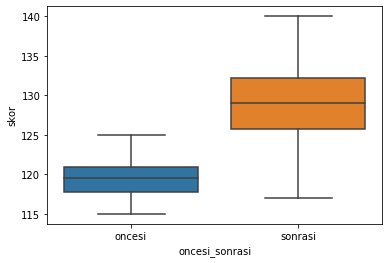

In [24]:
sns.boxplot(x= 'oncesi_sonrasi', y='skor', data = AB)

In [25]:
birlikte = pd.concat([oncesi, sonrasi], axis =1)
birlikte.columns = ['oncesi', 'sonrasi']

In [26]:
stat1, p1 = shapiro(birlikte.oncesi) # sonuçtaki iki değer test statistics and p value. p value > 0.05 olduğu için fail to reject
alpha = 0.05
if p1 > alpha:
    print("Fail to recejt! - Örneklem normal dağılımdan gelmektedir.")
else:
    print("Reject! - Örneklerm normal dağılımdan gelmemektedir.")

Fail to recejt! - Örneklem normal dağılımdan gelmektedir.


In [27]:
stat2, p2 = shapiro(birlikte.sonrasi)
alpha = 0.05
if p2 > alpha:
    print("Fail to recejt! - Örneklem normal dağılımdan gelmektedir.")
else:
    print("Reject! - Örneklerm normal dağılımdan gelmemektedir.")

Fail to recejt! - Örneklem normal dağılımdan gelmektedir.


In [32]:
stat, p = stats.levene(birlikte.oncesi, birlikte.sonrasi)
alpha = 0.05
print("Alanı veren nokta : {}, p value (alan) : {} ".format(stat, p))
if p > alpha:
    print("Fail to recejt! - Örneklem sabit varyansa sahiptir.")
else:
    print("Reject! - Örneklerm sabit varyansa sahip değildir.")

Alanı veren nokta : 8.31303288672351, p value (alan) : 0.0050844511807370246 
Reject! - Örneklerm sabit varyansa sahip değildir.


In [33]:
stat, p = stats.ttest_rel(birlikte.oncesi, birlikte.sonrasi)
alpha = 0.05
print("Alanı veren nokta : {}, p value (alan) : {} ".format(stat, p))
if p > alpha:
    print("Fail to recejt! - Verilerin birbireriyle ilişkisi vardır.")
else:
    print("Reject! - Verilerin birbireriyle ilişkisi yoktur.")

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

# ANOVA